In [1]:
''' states are all (i,j) where robot can possibly go
j
^
|
|___>i
'''

S = [(i,j) for i in range(1,10) for j in range(1,10)]

# removing walls
walls = [(2,4), (3,4), (4,4), (4,3), (4,2), (6,9), (6,8), (6,7), (6,6), (7,6), (8,6), (9,6)]
for wall in walls:
    S.remove(wall)

print(S)

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 1), (2, 2), (2, 3), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 1), (3, 2), (3, 3), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 1), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 7), (7, 8), (7, 9), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 7), (8, 8), (8, 9), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 7), (9, 8), (9, 9)]


In [2]:
# set of Actions
A = ['up', 'down', 'left', 'right']

In [3]:
# Reward
R = {s: 0 for s in S}
R[(9,9)] = 1
print(R)

{(1, 1): 0, (1, 2): 0, (1, 3): 0, (1, 4): 0, (1, 5): 0, (1, 6): 0, (1, 7): 0, (1, 8): 0, (1, 9): 0, (2, 1): 0, (2, 2): 0, (2, 3): 0, (2, 5): 0, (2, 6): 0, (2, 7): 0, (2, 8): 0, (2, 9): 0, (3, 1): 0, (3, 2): 0, (3, 3): 0, (3, 5): 0, (3, 6): 0, (3, 7): 0, (3, 8): 0, (3, 9): 0, (4, 1): 0, (4, 5): 0, (4, 6): 0, (4, 7): 0, (4, 8): 0, (4, 9): 0, (5, 1): 0, (5, 2): 0, (5, 3): 0, (5, 4): 0, (5, 5): 0, (5, 6): 0, (5, 7): 0, (5, 8): 0, (5, 9): 0, (6, 1): 0, (6, 2): 0, (6, 3): 0, (6, 4): 0, (6, 5): 0, (7, 1): 0, (7, 2): 0, (7, 3): 0, (7, 4): 0, (7, 5): 0, (7, 7): 0, (7, 8): 0, (7, 9): 0, (8, 1): 0, (8, 2): 0, (8, 3): 0, (8, 4): 0, (8, 5): 0, (8, 7): 0, (8, 8): 0, (8, 9): 0, (9, 1): 0, (9, 2): 0, (9, 3): 0, (9, 4): 0, (9, 5): 0, (9, 7): 0, (9, 8): 0, (9, 9): 1}


In [4]:
# State Transition Probability
P = {}

# initializing all probabilities as 0
for s in S:
    P[s] = {}
    for a in A:
        P[s][a] = {}
        for s_next in S:
            P[s][a][s_next] = 0

for s in S:
    for a in A:
      if a == 'up':
        s_next = (s[0], s[1]+1)
        if s_next in S and s_next not in walls:
          P[s][a][s_next] = 1

      elif a == 'down':
        s_next = (s[0], s[1]-1)
        if s_next in S and s_next not in walls:
          P[s][a][s_next] = 1

      elif a == 'left':
        s_next = (s[0]-1, s[1])
        if s_next in S and s_next not in walls:
          P[s][a][s_next] = 1

      elif a == 'right':
        s_next = (s[0]+1, s[1])
        if s_next in S and s_next not in walls:
          P[s][a][s_next] = 1

# the in state (3, 3) will not have any action
P[(3,3)]['down'][(3, 2)] = 0
P[(3,3)]['left'][(2, 3)] = 0

# right from (2, 3) and up from (3, 2) will lead to state (7,7) with probability 1
P[(2,3)]['right'][(7,7)] = 1
P[(3,2)]['up'][(7,7)] = 1

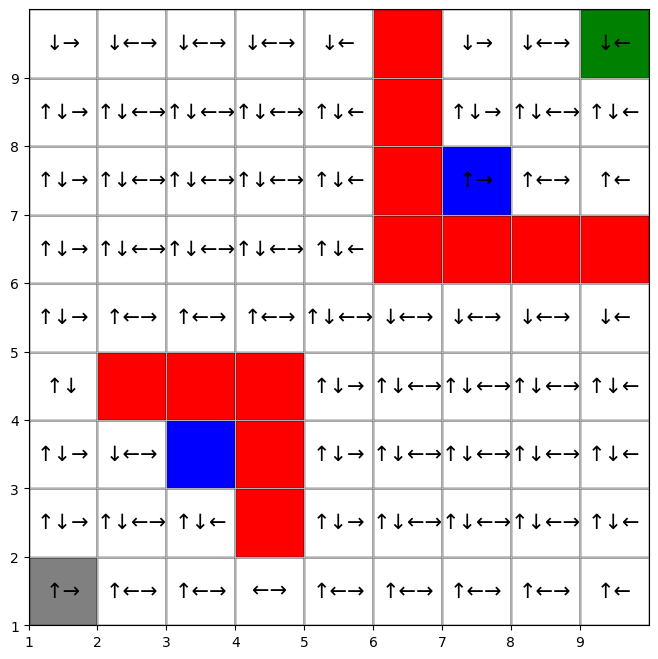

In [5]:
import numpy as np
import matplotlib.pyplot as plt

grid_size = 9

action_symbols = {
    'up': '↑',
    'down': '↓',
    'left': '←',
    'right': '→'
}

grid_arrows = np.full((grid_size, grid_size), "", dtype=object)

for s in S:
    i, j = s
    arrows = []
    for a in A:
        for s_next, prob in P[s][a].items():
            if prob == 1:
                arrows.append(action_symbols[a])
                break
    grid_arrows[i-1, j-1] = "".join(arrows)

fig, ax = plt.subplots(figsize=(8, 8))

for i in range(1, grid_size + 1):
    for j in range(1, grid_size + 1):
        if (i,j) == (1,1):
            facecolor = 'gray'
        elif (i,j) == (3, 3) or (i, j) == (7,7):
            facecolor = 'blue'
        elif (i,j) == (9,9):
            facecolor = 'green'
        elif (i, j) in walls:
            facecolor = 'red'
        else:
            facecolor = 'white'

        rect = plt.Rectangle((i - 1, j - 1), 1, 1, edgecolor='black', facecolor=facecolor)
        ax.add_patch(rect)

        if (i, j) in S and grid_arrows[i-1, j-1]:
            ax.text(i - 0.5, j - 0.5, grid_arrows[i-1, j-1],
                    ha='center', va='center', fontsize=15, color='black')

ax.set_xlim(0, grid_size)
ax.set_ylim(0, grid_size)
ax.set_xticks(np.arange(0, grid_size, 1))
ax.set_yticks(np.arange(0, grid_size, 1))
ax.set_xticklabels(np.arange(1, grid_size + 1))
ax.set_yticklabels(np.arange(1, grid_size + 1))
ax.grid(True)

plt.show()


In [6]:

def plot_optimal_policy_value_function(optimal_policy, optimal_value_function):
    grid_size = 9

    action_symbols = {
        'up': '↑',
        'down': '↓',
        'left': '←',
        'right': '→'
    }

    grid_arrows = np.full((grid_size, grid_size), "", dtype=object)
    grid_values = np.zeros((grid_size, grid_size))

    for (i, j), action in optimal_policy.items():
        grid_arrows[i-1, j-1] = action_symbols[action]

    for (i, j), value in optimal_value_function.items():
        grid_values[i-1, j-1] = value

    fig, axs = plt.subplots(1, 2, figsize=(16, 8))

    ax1 = axs[0]
    ax1.set_title("Optimal Policy")
    for i in range(1, grid_size + 1):
        for j in range(1, grid_size + 1):
            if (i, j) == (1, 1):
                facecolor = 'gray'
            elif (i, j) == (3, 3) or (i, j) == (7, 7):
                facecolor = 'blue'
            elif (i, j) == (9, 9):
                facecolor = 'green'
            elif (i, j) in walls:
                facecolor = 'red'
            else:
                facecolor = 'white'

            rect = plt.Rectangle((i - 1, j - 1), 1, 1, edgecolor='black', facecolor=facecolor)
            ax1.add_patch(rect)

            if (i, j) in optimal_policy and grid_arrows[i-1, j-1]:
                ax1.text(i - 0.5, j - 0.5, grid_arrows[i-1, j-1],
                        ha='center', va='center', fontsize=15, color='black')

    ax1.set_xlim(0, grid_size)
    ax1.set_ylim(0, grid_size)
    ax1.set_xticks(np.arange(0, grid_size, 1))
    ax1.set_yticks(np.arange(0, grid_size, 1))
    ax1.set_xticklabels(np.arange(1, grid_size + 1))
    ax1.set_yticklabels(np.arange(1, grid_size + 1))
    ax1.grid(True)

    ax2 = axs[1]
    ax2.set_title("Optimal Value Function")
    for i in range(1, grid_size + 1):
        for j in range(1, grid_size + 1):
            if (i, j) == (1, 1):
                facecolor = 'gray'
            elif (i, j) == (3, 3) or (i, j) == (7, 7):
                facecolor = 'blue'
            elif (i, j) == (9, 9):
                facecolor = 'green'
            elif (i, j) in walls:
                facecolor = 'red'
            else:
                facecolor = 'white'

            rect = plt.Rectangle((i - 1, j - 1), 1, 1, edgecolor='black', facecolor=facecolor)
            ax2.add_patch(rect)

            if (i, j) in optimal_value_function:
                ax2.text(i - 0.5, j - 0.5, f"{grid_values[i-1, j-1]:.2f}",
                        ha='center', va='center', fontsize=12, color='black')

    ax2.set_xlim(0, grid_size)
    ax2.set_ylim(0, grid_size)
    ax2.set_xticks(np.arange(0, grid_size, 1))
    ax2.set_yticks(np.arange(0, grid_size, 1))
    ax2.set_xticklabels(np.arange(1, grid_size + 1))
    ax2.set_yticklabels(np.arange(1, grid_size + 1))
    ax2.grid(True)

    plt.show()


In [7]:
def value_iteration(S, A, R, P):

  V = {s: 0 for s in S}
  policy = {s: A[1] for s in S}
  gamma = 0.9
  delta = 0.1

  while True:
    old_V = V.copy()
    old_policy = policy.copy()
    for s in S:
      Q = {}
      for a in A:
        Q[a] = R[s] + gamma*sum(P[s][a][s_next]*old_V[s_next] for s_next in S)

      V[s] = max(Q.values())
      policy[s] = max(Q, key = Q.get)

    if max(abs(V[s] - old_V[s]) for s in S) < delta:  #break by value function
      break
    # if old_policy == policy: # break by policy
    #   break


  return policy, V


Optimal Policy {(1, 1): 'up', (1, 2): 'up', (1, 3): 'right', (1, 4): 'down', (1, 5): 'down', (1, 6): 'down', (1, 7): 'down', (1, 8): 'down', (1, 9): 'down', (2, 1): 'up', (2, 2): 'up', (2, 3): 'right', (2, 5): 'left', (2, 6): 'down', (2, 7): 'down', (2, 8): 'down', (2, 9): 'down', (3, 1): 'up', (3, 2): 'up', (3, 3): 'up', (3, 5): 'left', (3, 6): 'down', (3, 7): 'down', (3, 8): 'down', (3, 9): 'down', (4, 1): 'left', (4, 5): 'left', (4, 6): 'down', (4, 7): 'down', (4, 8): 'down', (4, 9): 'down', (5, 1): 'left', (5, 2): 'down', (5, 3): 'down', (5, 4): 'down', (5, 5): 'down', (5, 6): 'down', (5, 7): 'down', (5, 8): 'down', (5, 9): 'down', (6, 1): 'left', (6, 2): 'down', (6, 3): 'down', (6, 4): 'down', (6, 5): 'down', (7, 1): 'left', (7, 2): 'down', (7, 3): 'down', (7, 4): 'down', (7, 5): 'down', (7, 7): 'up', (7, 8): 'up', (7, 9): 'right', (8, 1): 'left', (8, 2): 'down', (8, 3): 'down', (8, 4): 'down', (8, 5): 'down', (8, 7): 'up', (8, 8): 'up', (8, 9): 'right', (9, 1): 'left', (9, 2): 'd

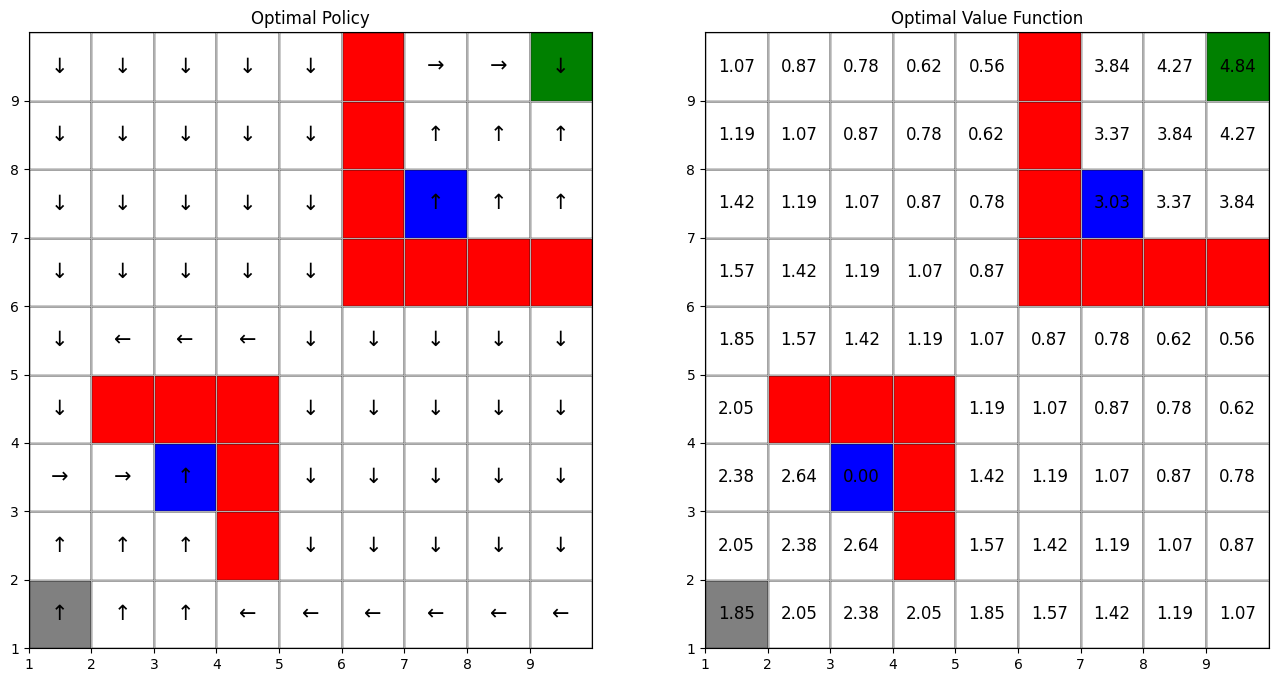

In [8]:
optimal_policy, optimal_value_function = value_iteration(S, A, R, P)
print('Optimal Policy', optimal_policy)
print('Optimal Value Function', optimal_value_function)
plot_optimal_policy_value_function(optimal_policy, optimal_value_function)

In [9]:
def policy_iteration(S, A, R, P):

  policy = {s: A[1] for s in S}

  while True:
    old_policy = policy.copy()

    V = policy_elvaluation(policy)

    policy = policy_improvement(V)
    if old_policy == policy:
      break

  return policy, V

def policy_elvaluation(policy, gamma = 0.9, delta = 0.1):

  V = {s: 0 for s in S}

  while (True):
    old_V = V.copy()

    for s in S:
      a = policy[s]
      V[s] = R[s] + gamma*sum(P[s][a][s_next]*old_V[s_next] for s_next in S)

    if max(abs(V[s] - old_V[s]) for s in S) < delta:
      break
  return V

def policy_improvement(V, gamma = 0.9):
  policy = {s: A[0] for s in S}

  for s in S:
    Q = {}
    for a in A:
      Q[a] =  R[s] + gamma*sum(P[s][a][s_next]*V[s_next] for s_next in S)

    policy[s] = max(Q, key = Q.get)

  return policy

Optimal Policy {(1, 1): 'up', (1, 2): 'up', (1, 3): 'right', (1, 4): 'down', (1, 5): 'down', (1, 6): 'down', (1, 7): 'down', (1, 8): 'down', (1, 9): 'down', (2, 1): 'up', (2, 2): 'up', (2, 3): 'right', (2, 5): 'left', (2, 6): 'down', (2, 7): 'down', (2, 8): 'down', (2, 9): 'down', (3, 1): 'up', (3, 2): 'up', (3, 3): 'up', (3, 5): 'left', (3, 6): 'down', (3, 7): 'down', (3, 8): 'down', (3, 9): 'down', (4, 1): 'left', (4, 5): 'left', (4, 6): 'down', (4, 7): 'down', (4, 8): 'down', (4, 9): 'down', (5, 1): 'left', (5, 2): 'down', (5, 3): 'down', (5, 4): 'down', (5, 5): 'down', (5, 6): 'down', (5, 7): 'down', (5, 8): 'down', (5, 9): 'down', (6, 1): 'left', (6, 2): 'down', (6, 3): 'down', (6, 4): 'down', (6, 5): 'down', (7, 1): 'left', (7, 2): 'down', (7, 3): 'down', (7, 4): 'down', (7, 5): 'down', (7, 7): 'up', (7, 8): 'up', (7, 9): 'right', (8, 1): 'left', (8, 2): 'down', (8, 3): 'down', (8, 4): 'down', (8, 5): 'down', (8, 7): 'up', (8, 8): 'up', (8, 9): 'right', (9, 1): 'left', (9, 2): 'd

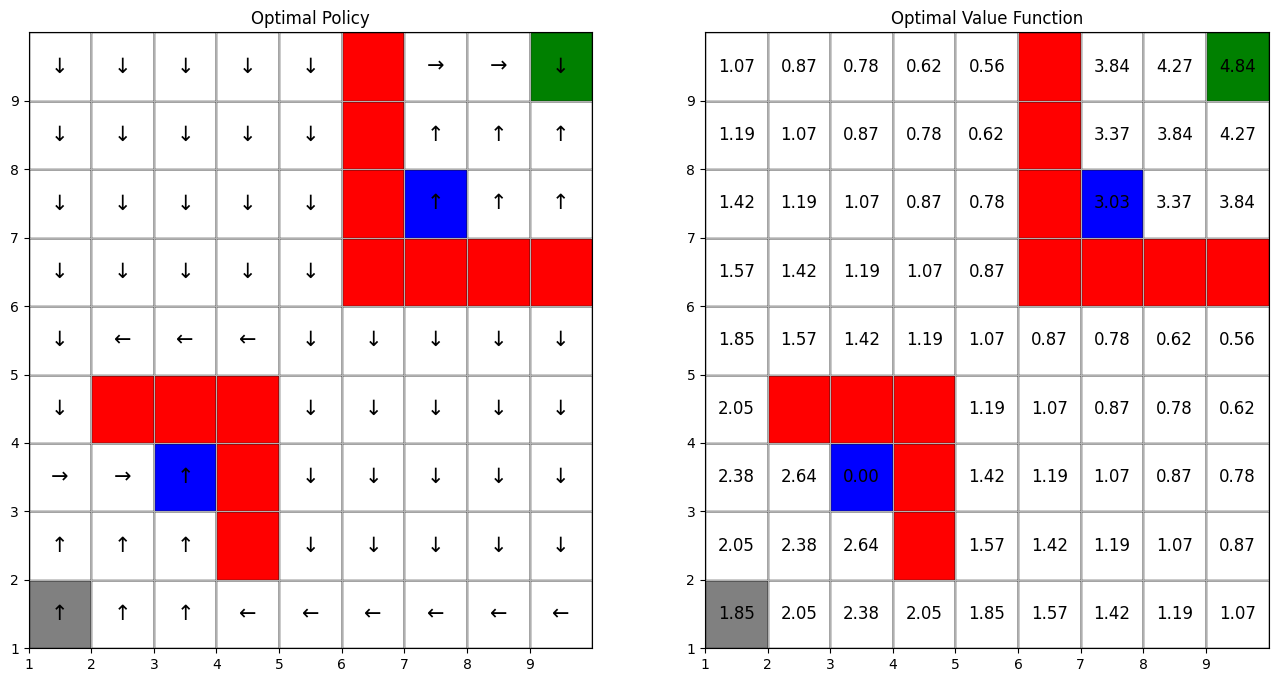

In [10]:
optimal_policy, optimal_value_function = policy_iteration(S, A, R, P)
print('Optimal Policy', optimal_policy)
print('Optimal Value Function', optimal_value_function)
plot_optimal_policy_value_function(optimal_policy, optimal_value_function)
